In [1]:
#page 54 , multiple and multivariate liner regression using Tensorflow
import pandas as pd
column_names = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin']
data = pd.read_csv('data/auto+mpg/auto-mpg.data',names=column_names,na_values='?',comment='\t',sep=' ',skipinitialspace=True)

In [2]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [3]:
data = data.drop('origin',axis=1)
print(data.isna().sum())
data = data.dropna()


mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
dtype: int64


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers import Dense , normalization
import seaborn as sns

C:\Users\vivek\anaconda3\envs\tensorFlowEnv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


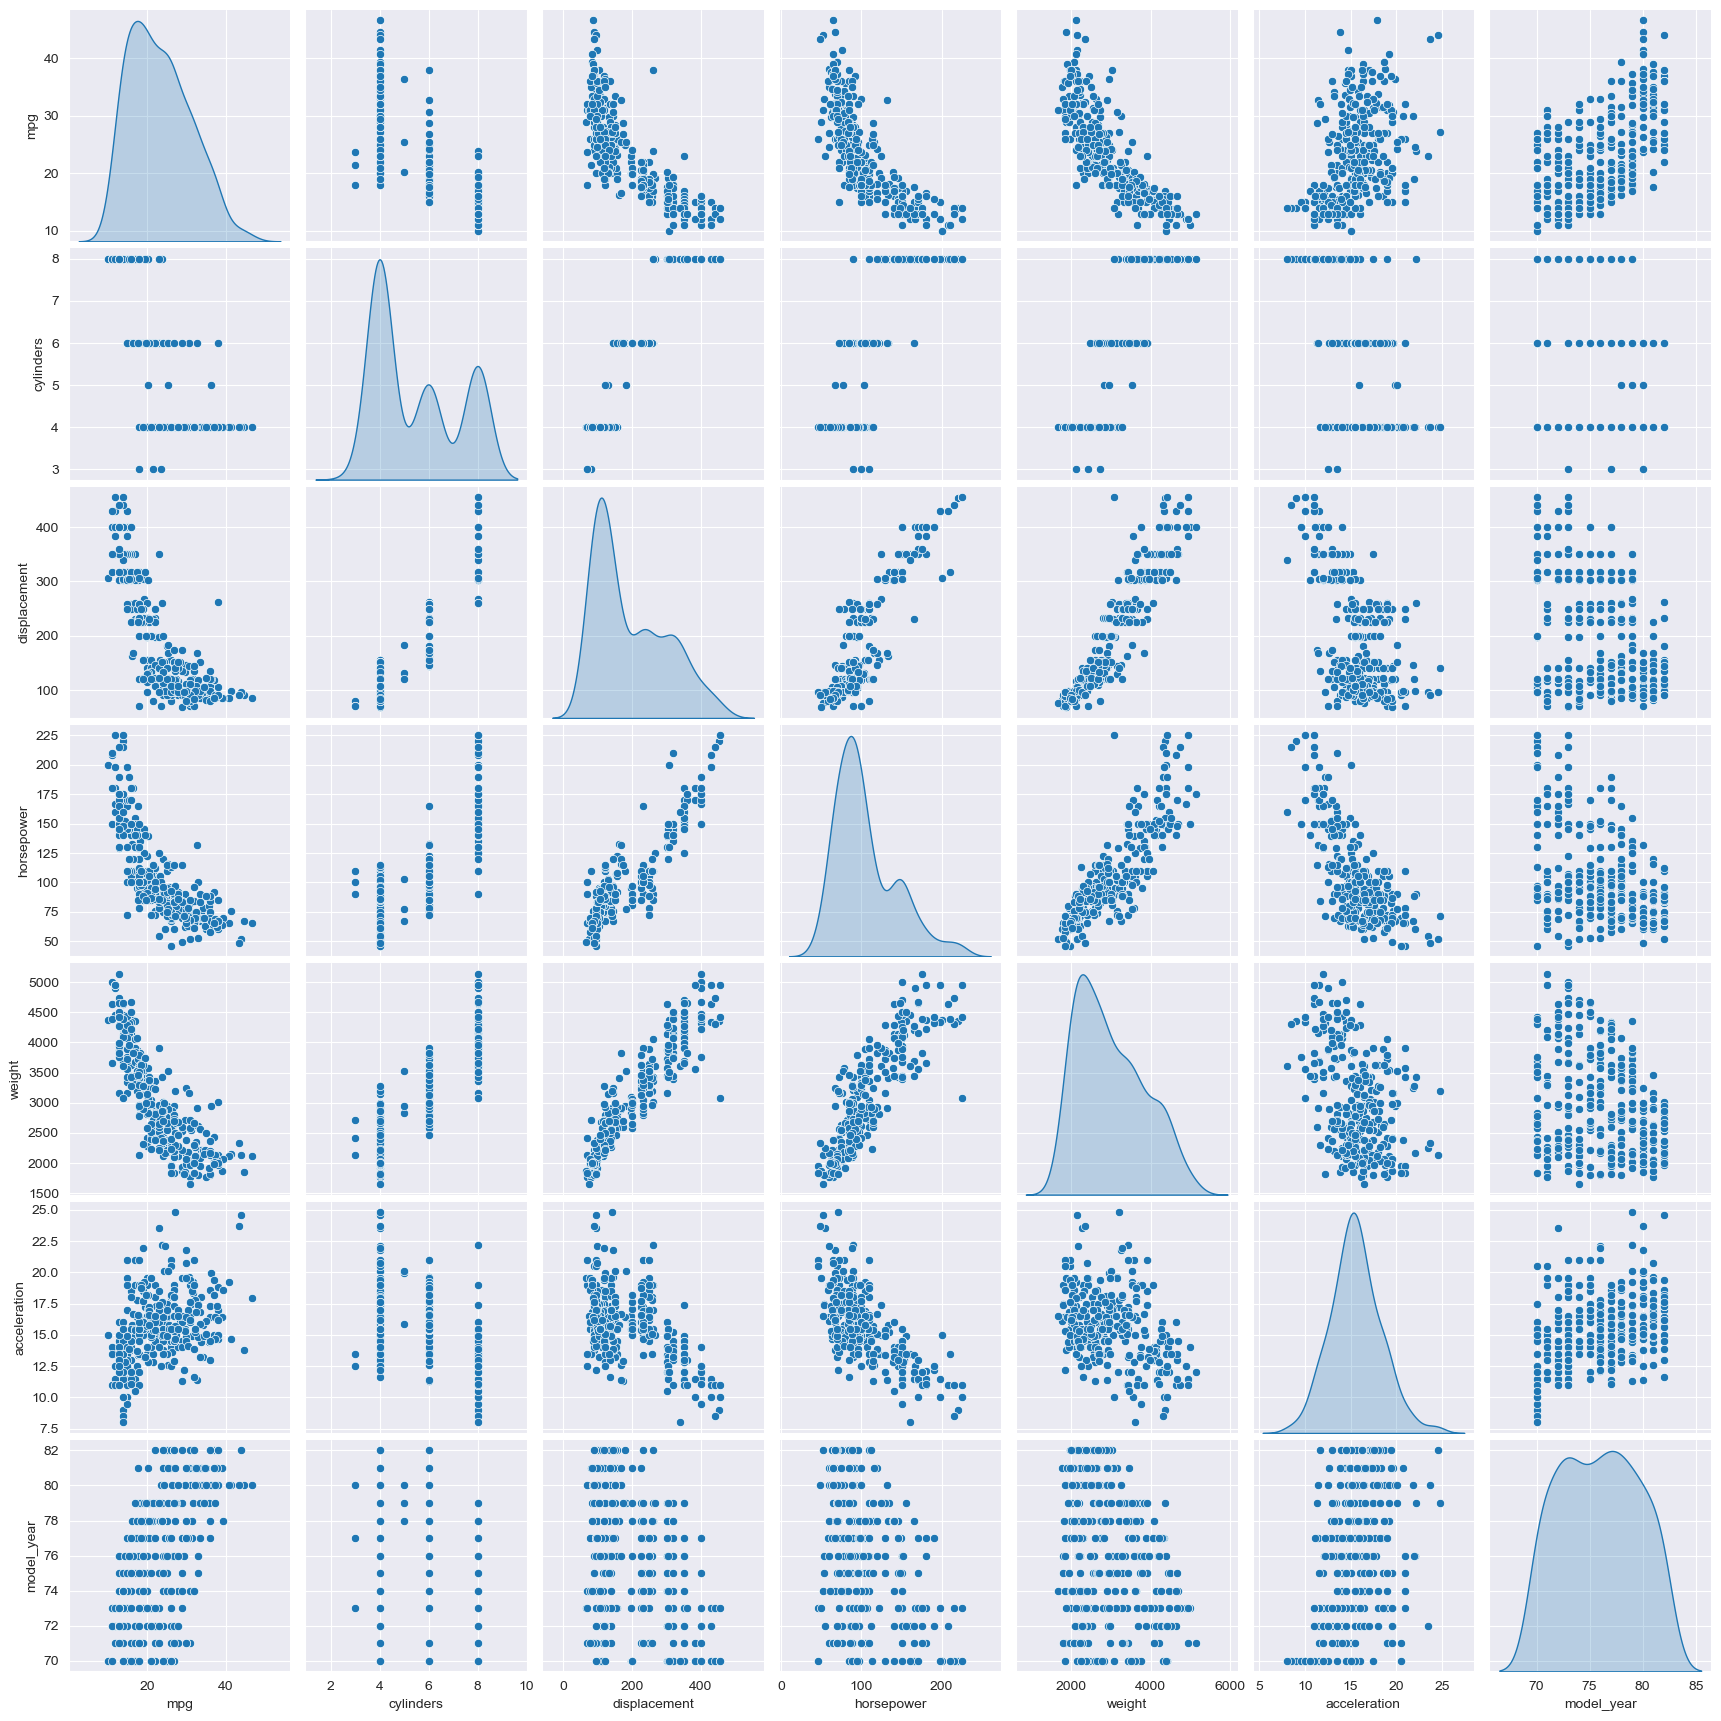

In [5]:
train_dataset = data.sample(frac=0.8,random_state=0)
test_dataset = data.drop(train_dataset.index)

sns.pairplot(train_dataset[['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year']],diag_kind='kde')

Epoch 1/100
8/8 [==============================] - 3s 32ms/step - loss: 583.2832 - val_loss: 591.5965
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 556.3141 - val_loss: 561.4705
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 528.4438 - val_loss: 527.7886
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 495.2614 - val_loss: 487.4842
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 455.5137 - val_loss: 438.2301
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 405.1330 - val_loss: 379.8395
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 347.6614 - val_loss: 312.7801
Epoch 8/100
8/8 [==============================] - 0s 9ms/step - loss: 281.6504 - val_loss: 242.1281
Epoch 9/100
8/8 [==============================] - 0s 7ms/step - loss: 213.7543 - val_loss: 173.2918
Epoch 10/100
8/8 [==============================] - 0s 7ms/step - loss: 150.2849 - val_los

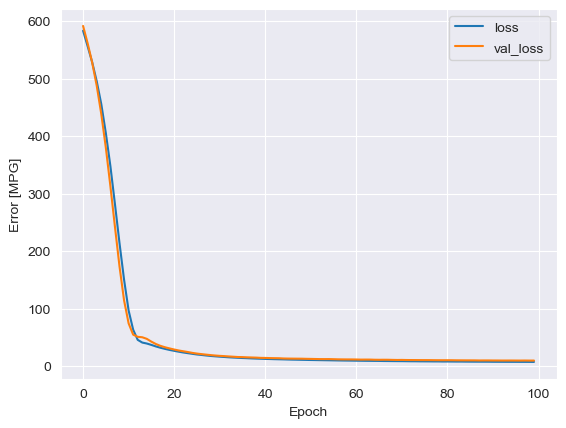

In [6]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('mpg')
test_labels = test_features.pop('mpg')

data_normalizer = tf.keras.layers.Normalization(axis=1)
data_normalizer.adapt(np.array(train_features))

model = tf.keras.models.Sequential([data_normalizer,Dense(64,activation='relu'),Dense(64,activation='relu'),Dense(1,activation=None)])


model.compile(optimizer=tf.keras.optimizers.Adam(),loss='mean_squared_error')

history = model.fit(x=train_features,y=train_labels,epochs=100,verbose=1,validation_split=0.2)
model.summary()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

In [25]:
#Page 70
#An example of Deep convolutional neural network DCNN:LeNet
import tensorflow as tf
from keras import datasets,layers,models,optimizers

EPOCHS = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = tf.keras.optimizers.Adam()
VALIDATION_SPLIT = 0.90

IMG_ROWS , IMG_COLS = 28,28
INPUT_SHAPE = (IMG_ROWS,IMG_COLS,1)
NB_CLASSES = 10

def build(INPUT_SHAPE,classes):
    model = models.Sequential()
    model.add(layers.Conv2D(20,(5,5),activation='relu',input_shape=INPUT_SHAPE))
    model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

    model.add(layers.Conv2D(50,(5,5),activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(500,activation='relu'))

    model.add(layers.Dense(classes,activation="softmax"))
    return model

(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

X_train = tf.reshape(X_train,(60000,28,28,1))
X_test = tf.reshape(X_test,(10000,28,28,1))

X_train = tf.cast(X_train,tf.float32)
X_test = tf.cast(X_test,tf.float32)

X_train , X_test = X_train/255.0,X_test/255.0



y_train = tf.keras.utils.to_categorical(y_train,NB_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test,NB_CLASSES)

model = build(INPUT_SHAPE,NB_CLASSES)
model.compile(loss="categorical_crossentropy",optimizer=OPTIMIZER,metrics=["accuracy"])
model.summary()

callbacks = [tf.keras.callbacks.TensorBoard(log_dir='./logs')]

history = model.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,verbose=VERBOSE,validation_split=VALIDATION_SPLIT,callbacks=callbacks)

score = model.evaluate(X_test,y_test,verbose=VERBOSE)
print("\nTest score:",score[0])
print('Test accuracy:',score[1])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 20)        520       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 20)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 50)          25050     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 50)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_7 (Dense)             (None, 500)              

In [26]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [24]:
%tensorboard --logdir logs

Launching TensorBoard...

In [31]:
log_folder = 'logs/train'

In [32]:
%reload_ext tensorboard

In [29]:
tensorboard -- logdir=log

Launching TensorBoard...

In [33]:
%tensorboard -- logdir={log_folder}

Launching TensorBoard...